In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols 
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm 
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro 
from scipy.stats import bartlett
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison



In [6]:
df= pd.read_csv('MDf_NAFilled.csv')
df

,Unnamed: 0,Unnamed: 0.1,ADMID,PATIENTID,Average_Age,PROBLEM,PROB_NAME,ADM_DATE,DIS_DATE,LOS,...,Ionised calcium,Lactate,White cell,DBP,HEIGHT,HR,O2SAT,RR,SBP,WEIGHT
0,0,0,566AF9016D2E9318EA7A3B3B8EF4441ABFE079F185CDB2...,3AB8F46DDDA4CC8466E3146BB26D8B5BD9E3B72D64EF22...,92,700097003.0,Hip fracture,35550,35565,15,...,1.220000,2.200000,12.270000,64.0,67.200000,80.0,96.0,14.0,141.0,69.999200
1,1,1,9997C278C602FABFE2BBDFAB818D67EF9C940418C75763...,D10067B6DE953CD140EBEFCEE70698B0CAEFF1BB557252...,82,700097003.0,Hip fracture,31824,31858,34,...,1.172366,1.787164,10.382805,62.0,62.008000,90.0,96.0,15.0,114.0,63.219396
2,2,2,9997C278C602FABFE2BBDFAB818D67EF9C940418C75763...,D10067B6DE953CD140EBEFCEE70698B0CAEFF1BB557252...,82,5913000.0,Fracture of neck of left femur,31824,31858,34,...,1.172366,1.787164,10.382805,62.0,62.008000,90.0,96.0,15.0,114.0,63.219396
3,3,3,A53241F3859B28AC2E43A68B8B24BE5806EA1341B1D16D...,4801FB1837D0F9A5F6041D39E48A72E9AC054365A4D202...,77,127287001.0,Intertrochanteric fracture of left hip,30203,30205,2,...,1.172366,1.787164,8.600000,63.0,64.790197,74.0,93.0,15.0,104.0,63.219396
4,4,4,BFA87E0D17A3084607B9439431707EEE54189FAC5AE26C...,CA5F39A757C1E534F2A95B3C730401ADEC3422C54A3F70...,82,127287001.0,Intertrochanteric fracture of left hip,32191,32196,5,...,1.230000,1.400000,12.870000,67.0,64.790197,91.0,100.0,15.0,112.0,63.219396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1203,1447,5264ED483D6DD14F34C7F41DBF5075B1812CB3149AB7F7...,59F3A979B8E5C797D425696F17530AC9EA020C2DCB9195...,82,700097003.0,"Hip fracture, right",31577,31594,17,...,1.120000,0.900000,11.700000,44.0,64.790197,96.0,97.0,16.0,98.0,63.219396
1204,1204,1448,9D04FE81A460B8242DC9548F2CD8921F4E0936A888C8A3...,222C0D67EE0A7D3722DFC9745E76074612AC706520EF06...,82,5913000.0,Fracture of neck of left femur,32235,32251,16,...,1.172366,1.787164,10.382805,54.0,64.790197,109.0,95.0,16.0,112.0,63.219396
1205,1205,1449,665FFC079CC5ACD04A4F6A7F7FF724897586A3AC6625B8...,92CF2F32964A9F8CAD9DF05CF7EBE8D7E3B5B1729C7AE1...,87,5913000.0,Fracture of neck of right femur,34372,34381,9,...,1.172366,1.787164,10.382805,50.0,64.790197,73.0,98.0,16.0,123.0,63.219396
1206,1206,1450,5FDAC7A8655D26734D99CE76A5CCDCDBC08243A5F0D860...,C77CE976D4B2D0F75FD3CF77B7119E4AC9208FE374097F...,92,5913000.0,Fracture of neck of left femur,35807,35814,7,...,1.172366,1.787164,13.000000,60.0,60.000000,91.0,97.0,15.0,114.0,63.219396


In [16]:
# Plotting Cancer Against LOS

In [13]:

Cancer = df.pivot(columns = 'CANCER', values = 'LOS')
Cancer

CANCER,N,Y
0,NaN,15.0
1,NaN,34.0
2,NaN,34.0
3,NaN,2.0
4,NaN,5.0
...,...,...
1203,NaN,17.0
1204,NaN,16.0
1205,NaN,9.0
1206,NaN,7.0


In [11]:
Cancer.describe()

CANCER,N,Y
count,246.000000,962.000000
mean,12.174797,16.310811
std,8.649521,11.351909
min,0.000000,2.000000
25%,7.000000,9.000000
50%,10.000000,13.000000
75%,14.750000,20.000000
max,52.000000,88.000000


In [17]:
conda install statsmodels

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'LOS [days]')

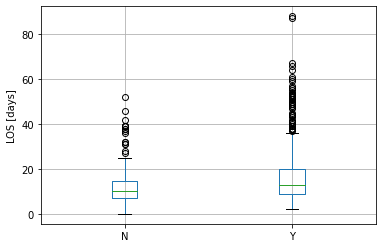

In [19]:
Cancer.boxplot()
plt.ylabel('LOS [days]')

In [21]:
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm 

In [48]:
Cancer_aov = ols('LOS~C(CANCER)', data=df).fit()
anova_lm(Cancer_aov)
#This appears to be significant therefore we will investiagte this further

,df,sum_sq,mean_sq,F,PR(>F)
C(CANCER),1.0,3351.253328,3351.253328,28.428109,1.160062e-07
Residual,1206.0,142169.551307,117.885200,NaN,NaN


In [26]:
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

In [27]:
shapiro(Cancer_aov.resid)

ShapiroResult(statistic=0.8312811851501465, pvalue=7.06514073665939e-34)

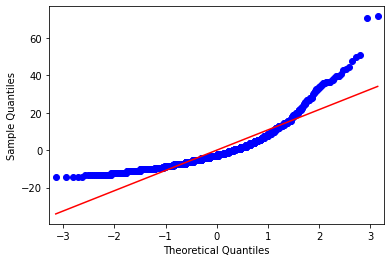

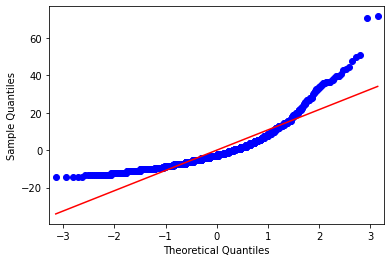

In [32]:
qqplot(Cancer_aov.resid, line ='s')

In [34]:
Yes = Cancer.Y.dropna()
No = Cancer.N.dropna()

In [75]:
shapiro(Yes)

ShapiroResult(statistic=0.8298697471618652, pvalue=8.991736209213863e-31)

In [76]:
shapiro(No)

ShapiroResult(statistic=0.825849711894989, pvalue=6.55037259649589e-16)

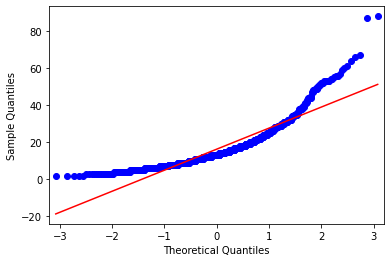

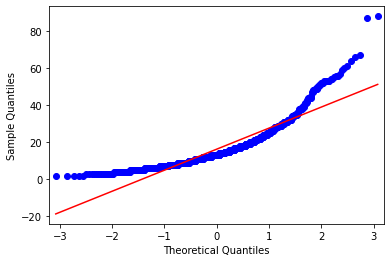

In [77]:
qqplot(Yes, line ='s')

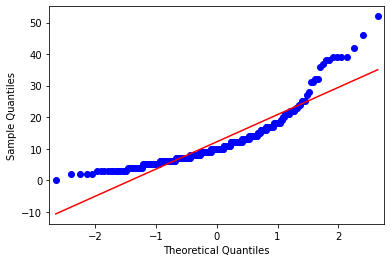

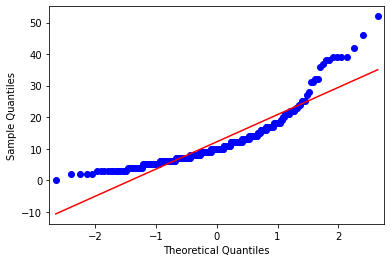

In [78]:
qqplot(No, line ='s')

In [36]:
from scipy.stats import bartlett
bartlett(Yes,No)

BartlettResult(statistic=25.778227388793688, pvalue=3.8298452535695303e-07)

Text(0, 0.5, 'Residuals')

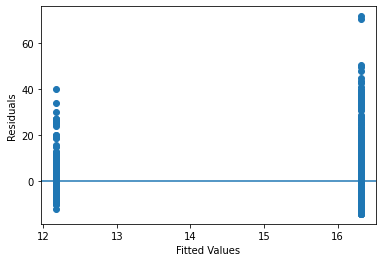

In [38]:
plt.scatter(Cancer_aov.fittedvalues ,Cancer_aov.resid)
plt.axhline(y=0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Text(0, 0.5, "Cook's DIstance")

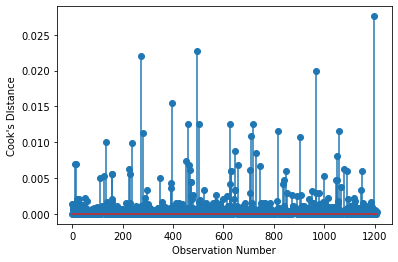

In [40]:
cooks = Cancer_aov.get_influence().cooks_distance[0] 
plt.stem(range(len(cooks)),cooks)
plt.xlabel('Observation Number')
plt.ylabel("Cook's DIstance")

In [41]:
## LOS Vs Age Group 

In [44]:
Age_Group = df.pivot(columns = 'Average_Age', values = 'LOS')
Age_Group

Average_Age,22,27,32,37,42,47,52,57,62,67,72,77,82,87,92,97,102
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN
1204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN
1205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [46]:
Age_Group.describe()

Average_Age,22,27,32,37,42,47,52,57,62,67,72,77,82,87,92,97,102
count,1.0,1.0,3.000000,3.000000,3.000000,7.000000,9.000000,15.000000,24.000000,68.000000,104.000000,159.000000,214.000000,281.000000,218.000000,93.000000,5.00000
mean,7.0,3.0,9.000000,14.000000,6.000000,16.285714,13.111111,7.666667,6.875000,12.264706,12.519231,15.283019,14.794393,16.455516,18.385321,17.408602,18.80000
std,NaN,NaN,5.196152,10.392305,3.605551,14.522560,10.623611,7.077799,3.779953,11.513286,11.182494,10.926180,10.794485,9.060451,12.604884,11.022937,9.14877
min,7.0,3.0,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000,2.000000,9.00000
25%,7.0,3.0,7.500000,11.000000,4.000000,4.500000,6.000000,3.500000,4.000000,5.000000,6.000000,8.000000,8.250000,10.000000,11.000000,9.000000,12.00000
50%,7.0,3.0,12.000000,20.000000,5.000000,9.000000,9.000000,4.000000,6.000000,9.000000,8.500000,12.000000,12.000000,14.000000,14.000000,15.000000,18.00000
75%,7.0,3.0,12.000000,20.000000,7.500000,27.000000,14.000000,8.500000,8.250000,13.500000,14.250000,18.000000,18.000000,20.000000,23.000000,22.000000,23.00000
max,7.0,3.0,12.000000,20.000000,10.000000,39.000000,31.000000,28.000000,18.000000,67.000000,61.000000,56.000000,66.000000,64.000000,88.000000,53.000000,32.00000


Text(0, 0.5, 'LOS [days]')

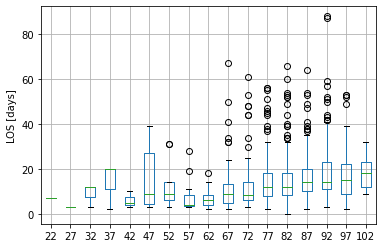

In [47]:
Age_Group.boxplot()
plt.ylabel('LOS [days]')

In [50]:
AG_aov = ols('LOS~C(Average_Age)', data=df).fit()
anova_lm(AG_aov)
# although the p vlaue is <0.05 the hypothesis testing show this doesnt fit with the assumptions 

,df,sum_sq,mean_sq,F,PR(>F)
C(Average_Age),16.0,7607.514492,475.469656,4.10609,9.628855e-08
Residual,1191.0,137913.290144,115.796213,NaN,NaN


In [52]:
shapiro(AG_aov.resid)

ShapiroResult(statistic=0.8202650547027588, pvalue=1.0242334826329026e-34)

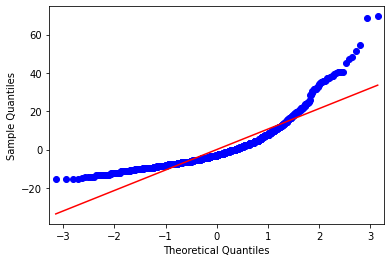

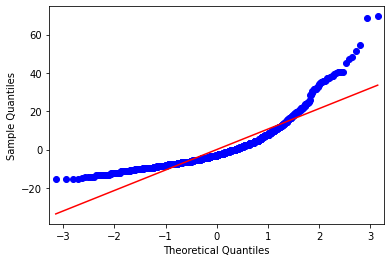

In [53]:
qqplot(AG_aov.resid, line ='s')

Text(0, 0.5, 'Residuals')

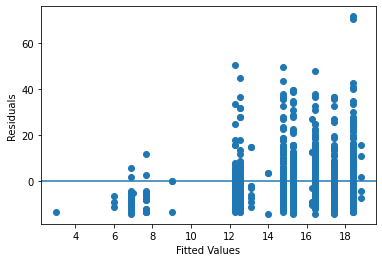

In [54]:
plt.scatter(AG_aov.fittedvalues ,Cancer_aov.resid)
plt.axhline(y=0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

/Users/geethsilva/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


Text(0, 0.5, "Cook's DIstance")

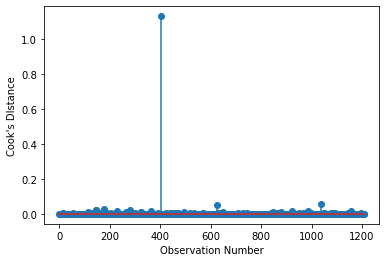

In [55]:
cooks = AG_aov.get_influence().cooks_distance[0] 
plt.stem(range(len(cooks)),cooks)
plt.xlabel('Observation Number')
plt.ylabel("Cook's DIstance")

In [57]:
mc = MultiComparison(df.LOS, df.Average_Age)
mc_results = mc.tukeyhsd()
print(mc_results)
#differnce between age group does occur when there is a great difference and there is enough data to support!

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    22     27     -4.0    0.9 -56.7491 48.7491  False
    22     32      2.0    0.9 -41.0695 45.0695  False
    22     37      7.0    0.9 -36.0695 50.0695  False
    22     42     -1.0    0.9 -44.0695 42.0695  False
    22     47   9.2857    0.9 -30.5889 49.1603  False
    22     52   6.1111    0.9 -33.2058  45.428  False
    22     57   0.6667    0.9 -37.8559 39.1892  False
    22     62   -0.125    0.9 -38.1934 37.9434  False
    22     67   5.2647    0.9 -32.3078 42.8372  False
    22     72   5.5192    0.9 -31.9589 42.9974  False
    22     77    8.283    0.9 -29.1334 45.6994  False
    22     82   7.7944    0.9 -29.5919 45.1807  False
    22     87   9.4555    0.9 -27.9101 46.8211  False
    22     92  11.3853    0.9 -25.9994   48.77  False
    22     97  10.4086    0.9 -27.0907 47.9079  False
    22    102     11.8    0.

In [58]:
## LOS vs Operation Undertaken 






In [60]:
Op = df.pivot(columns = 'OPCS_DESC', values = 'LOS')
Op

OPCS_DESC,CLOSED REDUCTION INSERTION DYNAMIC HIP SCREW,HEMIARTHROPLASTY HIP CANNULOK,HEMIARTHROPLASTY HIP CEMENTED USING EXETER STEM,HEMIARTHROPLASTY HIP CEMENTED USING EXETER TRAUMA STEM,OPEN REDUCTION INTERNAL FIXATION FEMUR,OPEN REDUCTION INTERNAL FIXATION FEMUR USING RIGID NAIL,OPEN REDUCTION INTERNAL FIXATION FRACTURE NECK OF FEMUR WITH HIP SCREW,OPEN REDUCTION INTERNAL FIXATION TROCHANTERIC FRACTURE FEMUR USING RIGID NAIL,TOTAL HIP REPLACEMENT,TOTAL HIP REPLACEMENT CEMENTED,TOTAL HIP REPLACEMENT EXETER CUP EXETER STEM
0,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1203,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1204,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1205,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

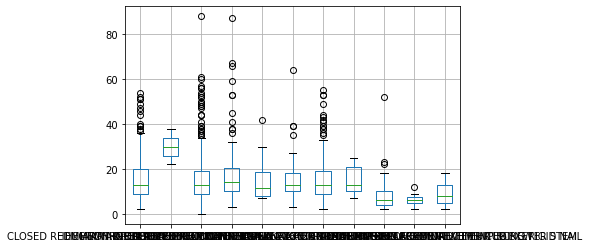

In [65]:
Op.boxplot()


In [67]:
OP_aov = ols('LOS~C(OPCS_DESC)', data=df).fit()
anova_lm(OP_aov)

,df,sum_sq,mean_sq,F,PR(>F)
C(OPCS_DESC),10.0,6291.196522,629.119652,5.408736,7.204892e-08
Residual,1197.0,139229.608114,116.315462,NaN,NaN


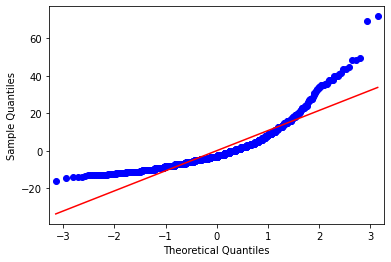

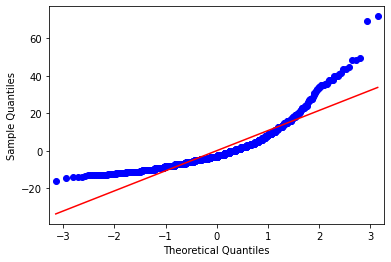

In [68]:
qqplot(OP_aov.resid, line ='s')

In [69]:
shapiro(OP_aov.resid)

ShapiroResult(statistic=0.8304665088653564, pvalue=6.104115330144629e-34)

Text(0, 0.5, 'Residuals')

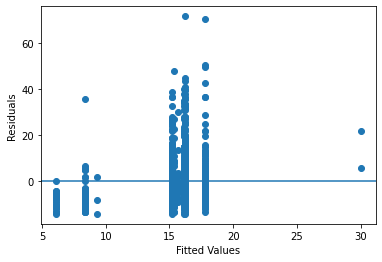

In [70]:
plt.scatter(OP_aov.fittedvalues ,Cancer_aov.resid)
plt.axhline(y=0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Text(0, 0.5, "Cook's DIstance")

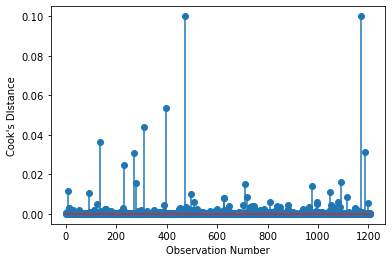

In [71]:
cooks = OP_aov.get_influence().cooks_distance[0] 
plt.stem(range(len(cooks)),cooks)
plt.xlabel('Observation Number')
plt.ylabel("Cook's DIstance")

In [74]:
mc = MultiComparison(df.LOS, df.OPCS_DESC)
mc_results = mc.tukeyhsd()
print(mc_results)

                                                                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                                        
                                    group1                                                                        group2                                    meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                 CLOSED REDUCTION INSERTION DYNAMIC HIP SCREW                                                 HEMIARTHROPLASTY HIP CANNULOK  13.8466 0.7487 -10.8774 38.5705  False
                                 CLOSED REDUCTION INSERTION DYNAMIC HIP SCREW                               HEMIARTHROPLASTY HIP CEMENTED USING EXETER STEM   0.0377    0.9  -3.0226  3.0981  False
                    

In [79]:
## Gender Vs LOS

In [80]:
GenderDF = df.pivot(columns = 'GENDER', values = 'LOS')
GenderDF

GENDER,1,2
0,15.0,NaN
1,NaN,34.0
2,NaN,34.0
3,NaN,2.0
4,NaN,5.0
...,...,...
1203,17.0,NaN
1204,NaN,16.0
1205,NaN,9.0
1206,NaN,7.0


<AxesSubplot:>

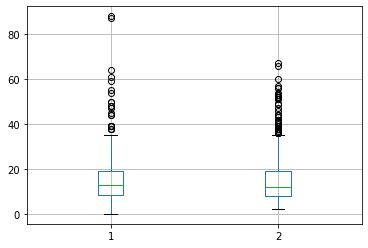

In [81]:
GenderDF.boxplot()

In [82]:
GenderDF.describe()

GENDER,1,2
count,362.000000,846.000000
mean,15.867403,15.297872
std,11.758846,10.632257
min,0.000000,2.000000
25%,8.250000,8.000000
50%,13.000000,12.000000
75%,19.000000,19.000000
max,88.000000,67.000000


In [83]:
GenderDF_aov = ols('LOS~C(GENDER)', data=df).fit()
anova_lm(GenderDF_aov)
#No Significant Differece therefore dont need to continue any further

,df,sum_sq,mean_sq,F,PR(>F)
C(GENDER),1.0,82.233106,82.233106,0.68189,0.4091
Residual,1206.0,145438.571529,120.595830,NaN,NaN


In [101]:
Male = GenderDF[1].dropna()
Female = GenderDF[2].dropna()

In [102]:
shapiro(GenderDF_aov.resid)

ShapiroResult(statistic=0.8282862305641174, pvalue=4.138781529420884e-34)

In [103]:
shapiro(Male)

ShapiroResult(statistic=0.7836037278175354, pvalue=1.4152737163355525e-21)

In [104]:
shapiro(Female)

ShapiroResult(statistic=0.8468911051750183, pvalue=8.418588380236542e-28)

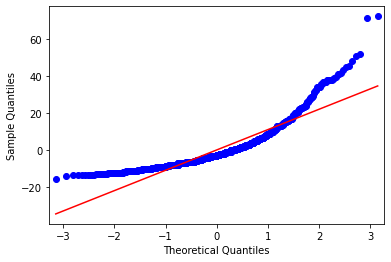

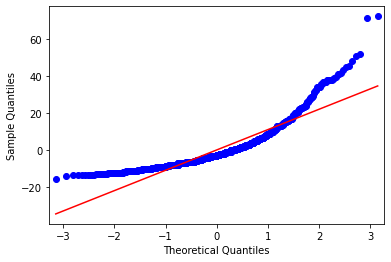

In [105]:
qqplot(GenderDF_aov.resid, line ='s')

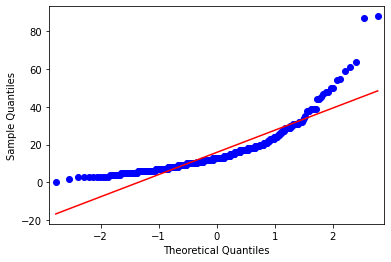

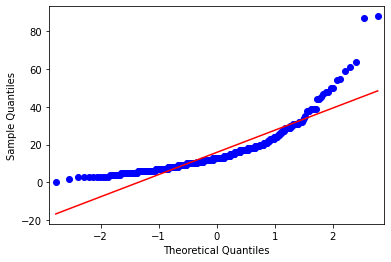

In [106]:
qqplot(Male, line ='s')

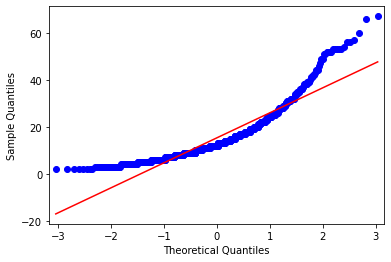

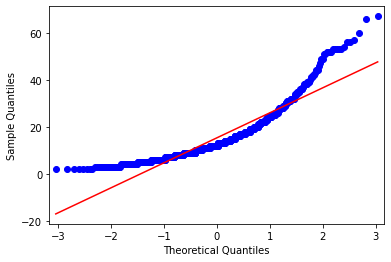

In [107]:
qqplot(Female, line ='s')

In [108]:
bartlett(Male, Female)

BartlettResult(statistic=5.259094634806171, pvalue=0.021832373174482972)

Text(0, 0.5, 'Residuals')

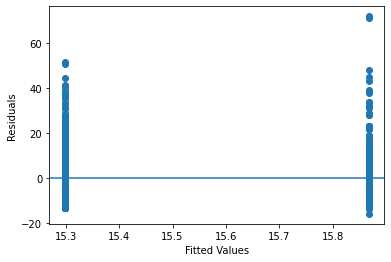

In [109]:
plt.scatter(GenderDF_aov.fittedvalues ,GenderDF_aov.resid)
plt.axhline(y=0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Text(0, 0.5, "Cook's DIstance")

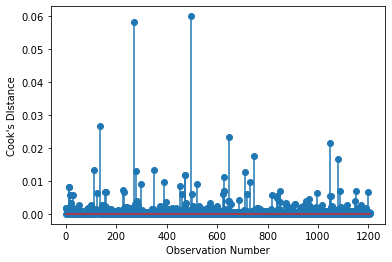

In [110]:
cooks = GenderDF_aov.get_influence().cooks_distance[0] 
plt.stem(range(len(cooks)),cooks)
plt.xlabel('Observation Number')
plt.ylabel("Cook's DIstance")